In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('5003.png')
# reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# convert to HSV
figure_size = 2
# the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

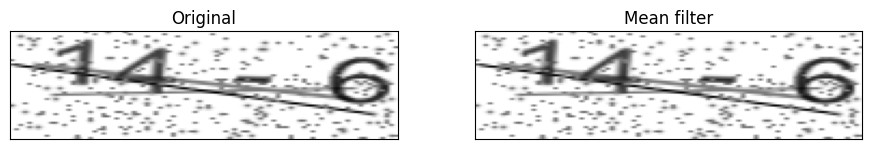

In [ ]:
# The image will first be converted to grayscale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 1
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

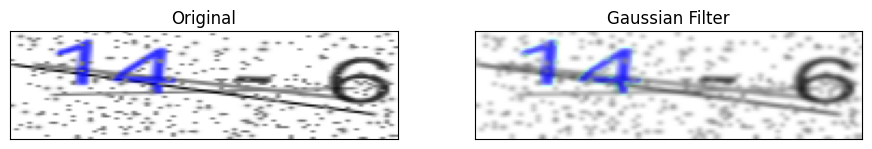

In [ ]:
figure_size = 3
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

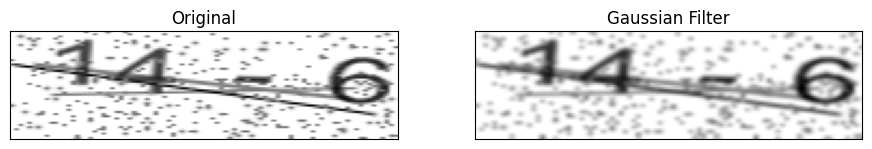

In [ ]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

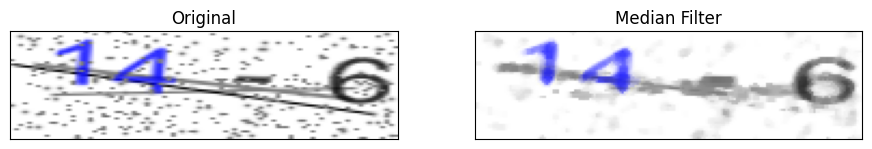

In [ ]:
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.CO
plt.show()LOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])

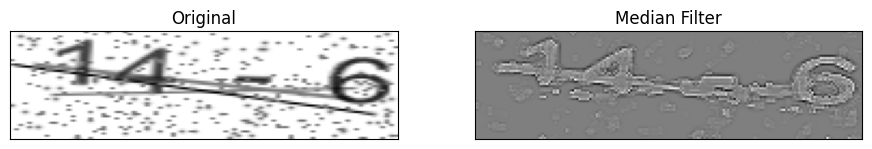

In [ ]:
figure_size=5
median_image = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size):
  temp = []

  indexer = filter_size // 2

  new_image = data.copy()

  nrow, ncol = data.shape

  for i in range(nrow):

      for j in range(ncol):

          for k in range(i-indexer, i+indexer+1):

              for m in range(j-indexer, j+indexer+1):

                  if (k > -1) and (k < nrow):

                      if (m > -1) and (m < ncol):

                          temp.append(data[k,m])

          temp.remove(data[i,j])


          max_value = max(temp)

          min_value = min(temp)

          if data[i,j] > max_value:

              new_image[i,j] = max_value

          elif data[i,j] < min_value:

              new_image[i,j] = min_value

          temp =[]

  return new_image.copy()

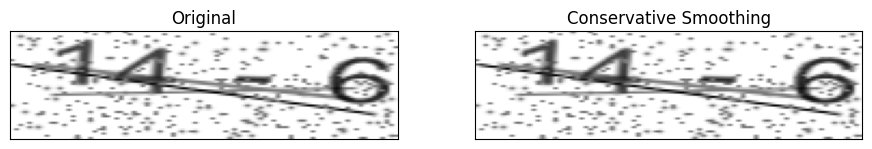

In [ ]:
new_image = conservative_smoothing_gray(image2,33)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
np.array_equal(new_image, image2)

False

In [ ]:
new_image == image2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

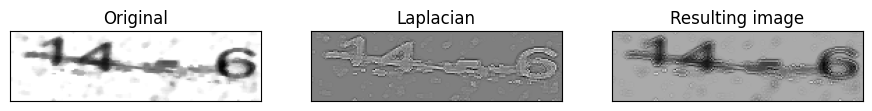

In [ ]:
new_image = cv2.Laplacian(median_image,cv2.CV_64F)
plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(median_image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(median_image + new_image, cmap='gray'),plt.title('Resulting image')
plt.xticks([]), plt.yticks([])
plt.show()

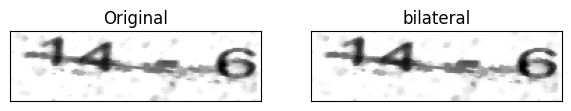

In [ ]:
new_image = cv2.bilateralFilter(median_image,5,10,10)
plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(median_image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('bilateral')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img = cv2.imread('5005.png', 0)

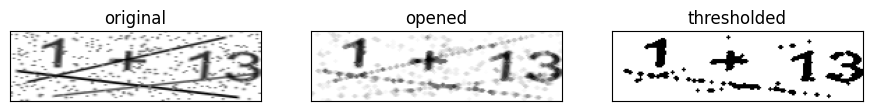

In [ ]:
kernel_size = 3
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
opening = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# Apply binary thresholding with a threshold value of 127
threshold_value = 190
max_value = 255
ret, thresholded_img = cv2.threshold(opening, threshold_value, max_value, cv2.THRESH_BINARY)
plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(img, cmap='gray'),plt.title('original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(opening, cmap='gray'),plt.title('opened')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thresholded_img, cmap='gray'),plt.title('thresholded')
plt.xticks([]), plt.yticks([])
plt.show()



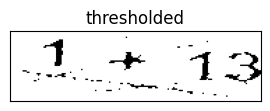

In [ ]:
kernel_size = 3
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
opening2 = cv2.morphologyEx(thresholded_img, cv2.MORPH_DILATE, kernel)
plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(opening2, cmap='gray'),plt.title('thresholded')
plt.xticks([]), plt.yticks([])
plt.show()

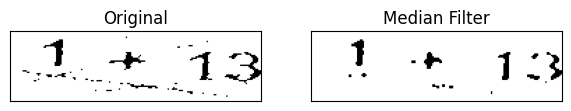

In [ ]:
figure_size=3
median_filtered = cv2.medianBlur(opening2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(opening2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(median_filtered, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
def process(img):
  kernel_size = 3
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
  closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

  # Apply binary thresholding with a threshold value of 127
  threshold_value = 190
  max_value = 255
  ret, thresholded_img = cv2.threshold(closing, threshold_value, max_value, cv2.THRESH_BINARY)

  kernel_size = 3
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
  dilation = cv2.morphologyEx(thresholded_img, cv2.MORPH_DILATE, kernel)
  return dilation

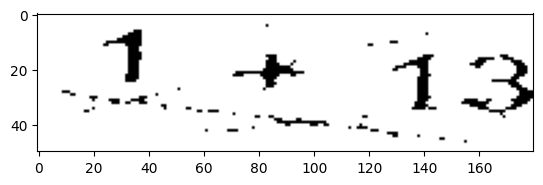

In [ ]:
img = cv2.imread('5005.png', 0)
final = process(img)
plt.imshow(final, cmap='gray')
plt.show()

# preprocess the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/captcha/medium-captcha.tar.gz .

In [ ]:
!cp /content/drive/MyDrive/captcha/medium-captcha-2.tar.gz .

In [ ]:
!tar -xf medium-captcha.tar.gz

In [ ]:
!tar -xf medium-captcha-2.tar.gz

In [ ]:
!ls -1 label | wc -l

10000


In [ ]:
!rm -rf processed_captcha
!mkdir processed_captcha

In [ ]:
import glob
img_path_list = glob.glob("./captcha/*.png")

In [ ]:
from tqdm import tqdm

for img_path in tqdm(img_path_list):
  img = cv2.imread(img_path, 0)
  final = process(img)
  new_img_path = img_path.replace('captcha','processed_captcha')
  cv2.imwrite(new_img_path, final)

100%|██████████| 10000/10000 [00:05<00:00, 1948.36it/s]


In [ ]:
proc_path_list = glob.glob('./processed_captcha/*.png')

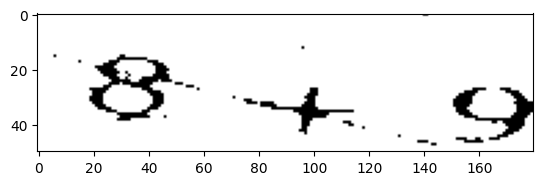

In [ ]:
imgg = cv2.imread(proc_path_list[2], 0)
plt.imshow(imgg, cmap='gray')
plt.show()

In [ ]:
!tar -czf processed.tar.gz processed_captcha/ label/

In [ ]:
!cp processed.tar.gz /content/drive/MyDrive/captcha/processed.tar.gz